# Exploratory Data Analysis
Now that my dataset is cleaned, I am going to do some exploring of the track breakdowns, and since this is an NLP project get some insight into word counts to help decide which words to add to my stop words

### Imports

In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_colwidth = 400
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('./data/lyrics_cleaned.csv')
df.head()

,artist,featured,aliases,title,track_id,explicit,release_year,lyrics,skip
0,Jason Derulo,Ty Dolla $ign & Nicki Minaj,"Young Money, Barbie, Nicki, Minaj,Jason, Derulo",Swalla,6kex4EBAj0WHXDKZMEJaaF,True,2017.0,"Drank Young Money Love in a thousand different flavors I wish that I could taste them all tonight No, I aint got no dinner plans So you should bring all your friends I swear that a-all yall my type All you girls in here, if youre feeling thirsty Come on take a sip cause you know what Im servin, ooh Shimmy shimmy yay, shimmy yay, shimmy ya (Drank) Swalla-la-la (Drank) Swalla-la-la (Swalla...",1
1,Jason Derulo,2 Chainz,"Jason, Derulo",Talk Dirty,6g6A7qNhTfUgOSH7ROOxTD,True,2013.0,"(Jason, haha Jason Derulo) Haha, get Jazzy on em Im that flight that you get on, international First-class seat on my lap, girl, riding comfortable (Oh, yeah) Ha, cause I know what da girl dem need, New York to Haiti I got lipstick stamps on my passport, you make it hard to leave Been around the world, dont speak the language (Uh-huh) But your booty dont need explaining (Uh-huh) All I real...",1
2,Jason Derulo,Snoop Dogg,"Jason, Derulo,Snoop, Dogg",Wiggle,2sLwPnIP3CUVmIuHranJZU,False,2013.0,"Ayo, Jason (Oh yeah!) Say somethin to her, holla at her Haha, I got one question Haha, how do you fit, all that, in them jeans? Hahaha You know what to do with that big fat butt Wiggle wiggle wiggle Wiggle wiggle wiggle Wiggle wiggle wiggle Just a little bit (swing) Patty cake, patty cake, with no hands Got me in this club, making wedding plans If I take pictures while you do your dance (d...",1
3,Jason Derulo,NaN,"Jason, Derulo",Trumpets,5KONnBIQ9LqCxyeSPin26k,False,2013.0,"Every time that you get undressed I hear symphonies in my head I wrote this song just looking at you oh, oh Yeah, the drums they swing low And the trumpets they go And the trumpets they go Yeah, the trumpets they go Da da, da ra ra da, da, da Da, ra, ra, ra, da, da Da da, da ra ra da, da, da (ooh, woo) Da, ra, ra, ra, da, da (they go) Haha, is it weird that I hear Violins whenever youre gone...",0
4,Jason Derulo,French Montana,"Jason, Derulo,French, Montana",Tip Toe,2z4pcBLQXF2BXKFvd0BuB6,False,2017.0,"Derulo Whine fa me darlin Way you move ya spine is alarmin Mi wan you just... Big fat thang, overflowin Skin tight dress, couldnt hold it Way too thick like its swollen Girl, youre too bad and you know it When you drop down, lose focus When that thing clap, thats a bonus Mmm, that cake looking appetizing Backpack full, thats a crisis Bring that body my way Cant take it off my brain Look li...",1


In [3]:
df['release_year'] = df['release_year'].astype(int) # was float

In [4]:
df.isnull().sum() # 'Null' values just means it is not applicable (explicit, track_id) info was not retrievable.

artist             0
featured        8390
aliases         4168
title              0
track_id        1995
explicit        2068
release_year       0
lyrics             0
skip               0
dtype: int64

In [5]:
df['skip'].value_counts()

0    8705
1    2750
Name: skip, dtype: int64

### Visualizing Explicit Count
Keeping in mind that there are 2,000 tracks that I do not have values for whether the song is explicit or not, There are still alot more songs with explicit contents in this selection. I also want to see of the skipped songs how many of them are explicit/not.

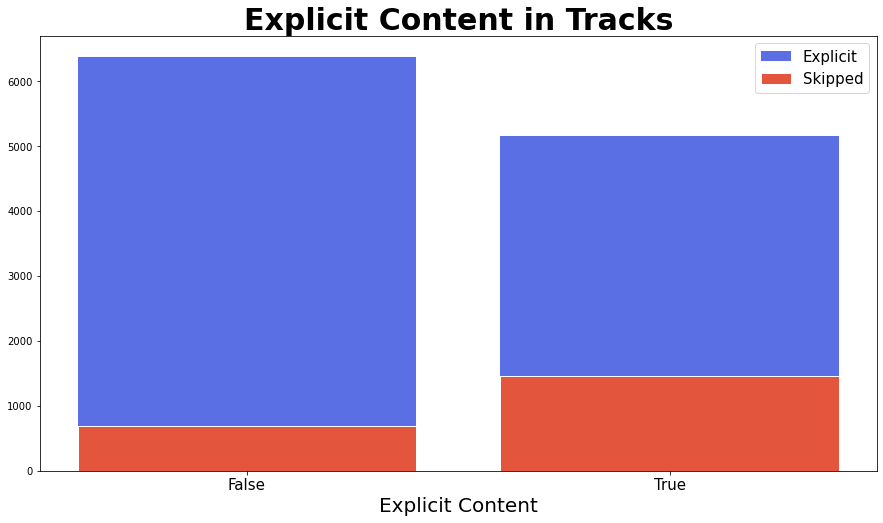

In [6]:
plt.figure(figsize=(15,8))

# Values of each group
barla = df.loc[(df['skip'] == 1)].groupby('explicit')['skip'].count()
barua = df['explicit'].value_counts()
 
# Heights of bars1 + bars2
# bars_a = np.add(bars1a, bars2a).tolist()
 
# The position of the bars on the x-axis
r = [0,1]
 
# Create bottom bars

plt.bar(r, barua, bottom=barla, color="#596FE3", label='Explicit')
# Create top bars
plt.bar(r, barla, color='#E3553D', edgecolor='white', label='Skipped')


 
# Custom X axis
plt.xticks(r, ['False', 'True'], size=15)
plt.xlabel("Explicit Content", size =20)
plt.title('Explicit Content in Tracks', size=30, weight = 'bold')
plt.legend(fontsize=15); 
plt.savefig('./visuals/explicit.png', transparent=True,)
# Show graphic
plt.show();

### Visualizing Songs by Release Year
I want to see the song count of songs by release year, and also the count of songs by release year for those that were 'Skipped', gives me an insight of when this habit of self-announcing became a big trend

In [7]:
# A few songs from Eve had the incorrect release_year
df.loc[df['track_id'] == '1Zi2ezNOqt9y9irC11xYpN', 'release_year'] = 1998
df.loc[df['track_id'] == '7axHsE7UZtNMMv5jL3rC79', 'release_year'] = 2015
df.loc[df['track_id'] == '56wmud54wP9RfwXjmyiVlb', 'release_year'] = 2019
df.loc[df['track_id'] == '4ATCXmA5KrngyQ8JIMKLeP', 'release_year'] = 2001

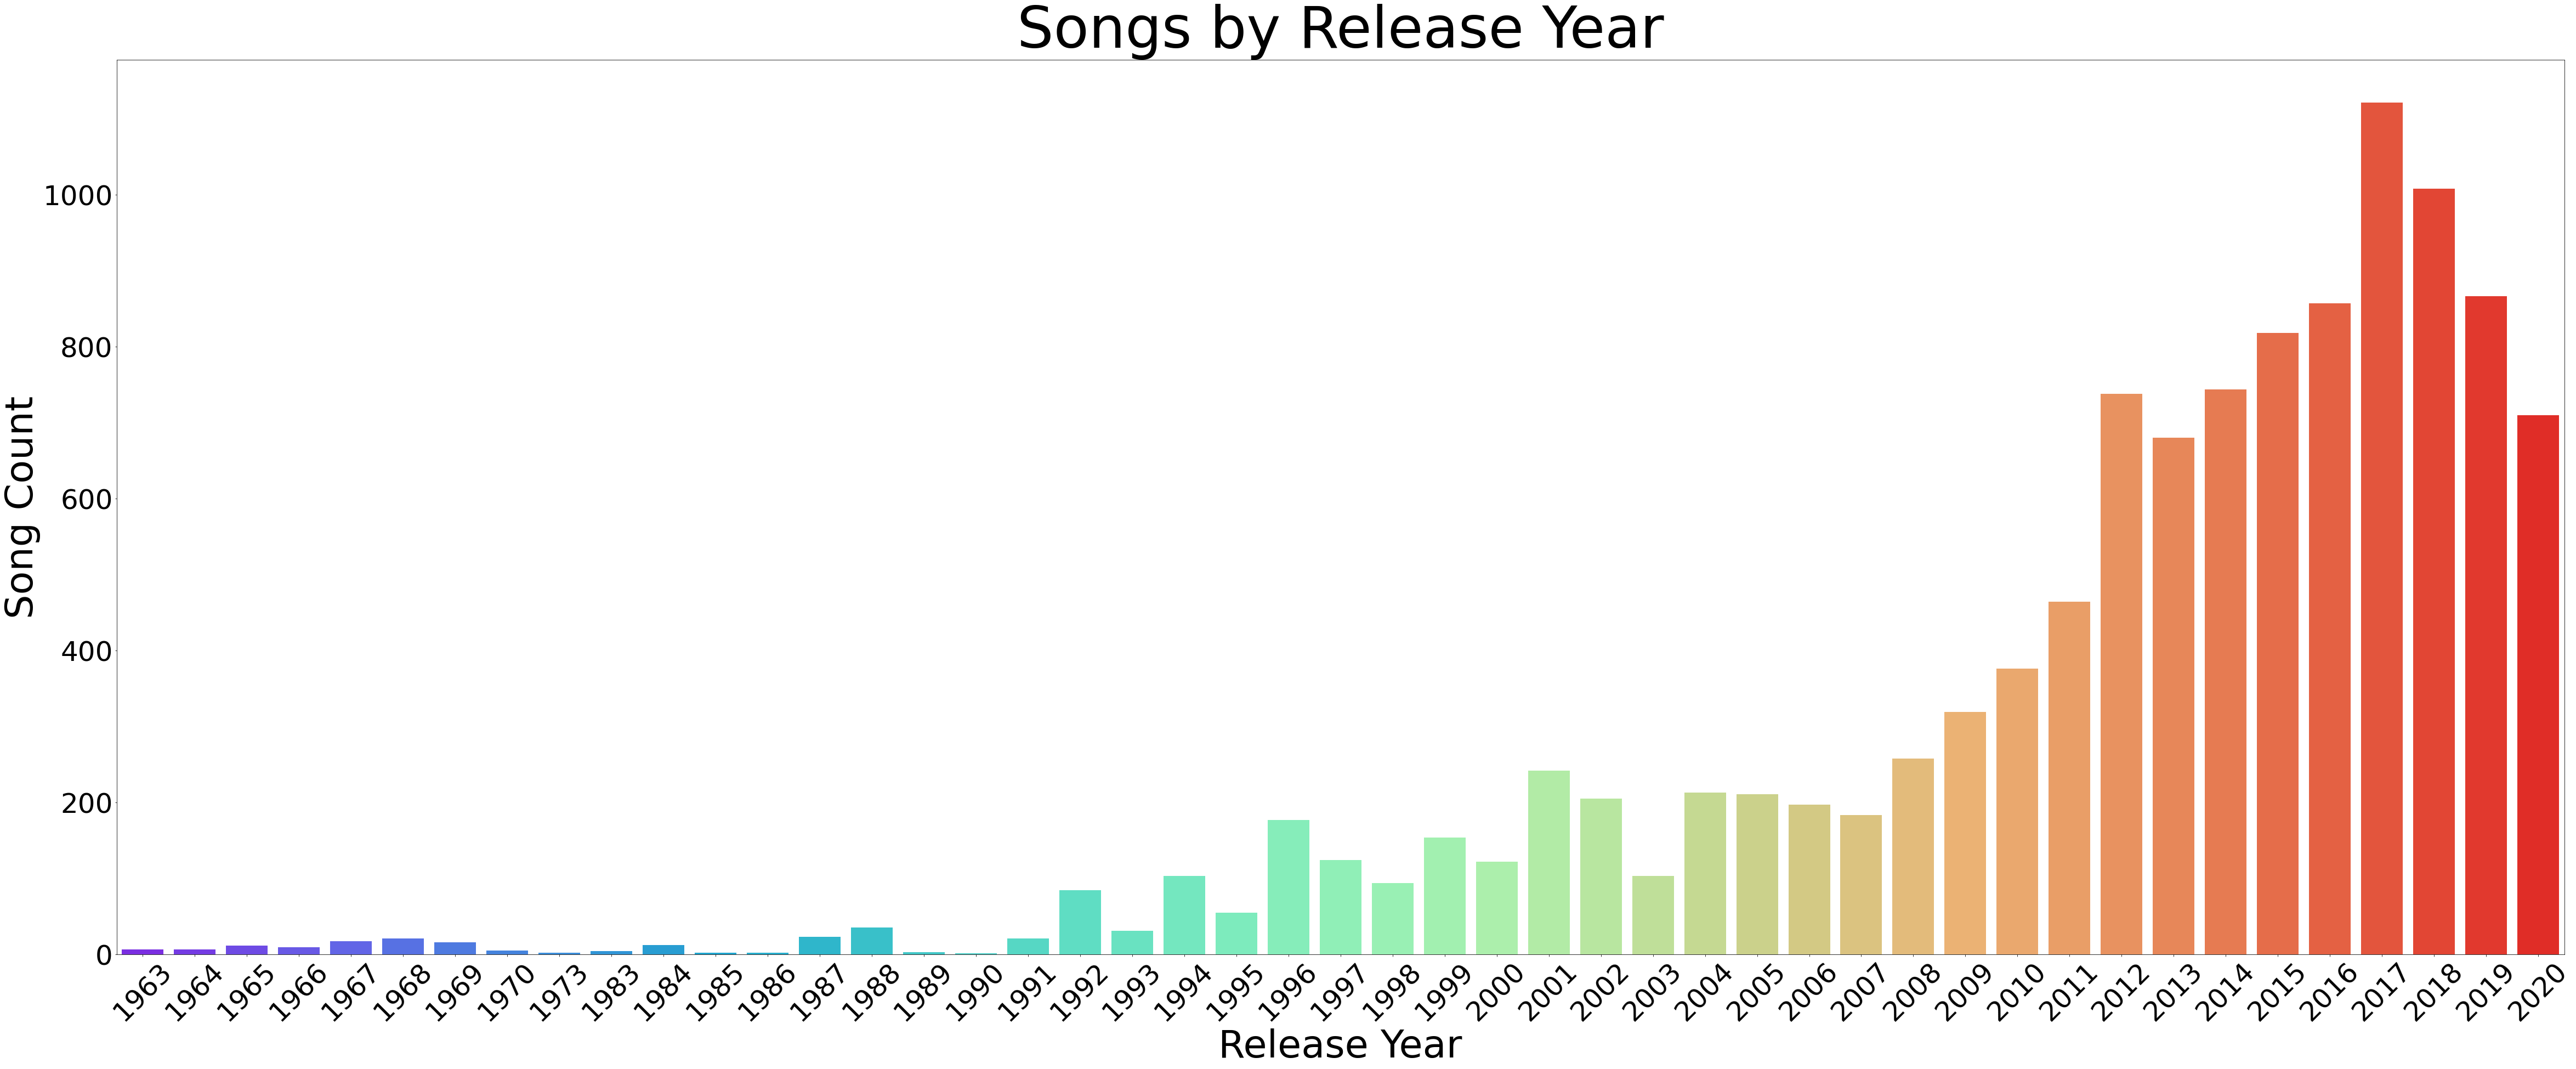

In [8]:
plt.figure(figsize=(80,30))
sns.countplot(df['release_year'], palette='rainbow')
plt.title("Songs by Release Year", size = 105, pad=20)
plt.ylabel("Song Count", size = 70,)
plt.yticks(size = 50)
plt.xlabel("Release Year", size = 70,)
plt.xticks(rotation=45, size = 50) ;


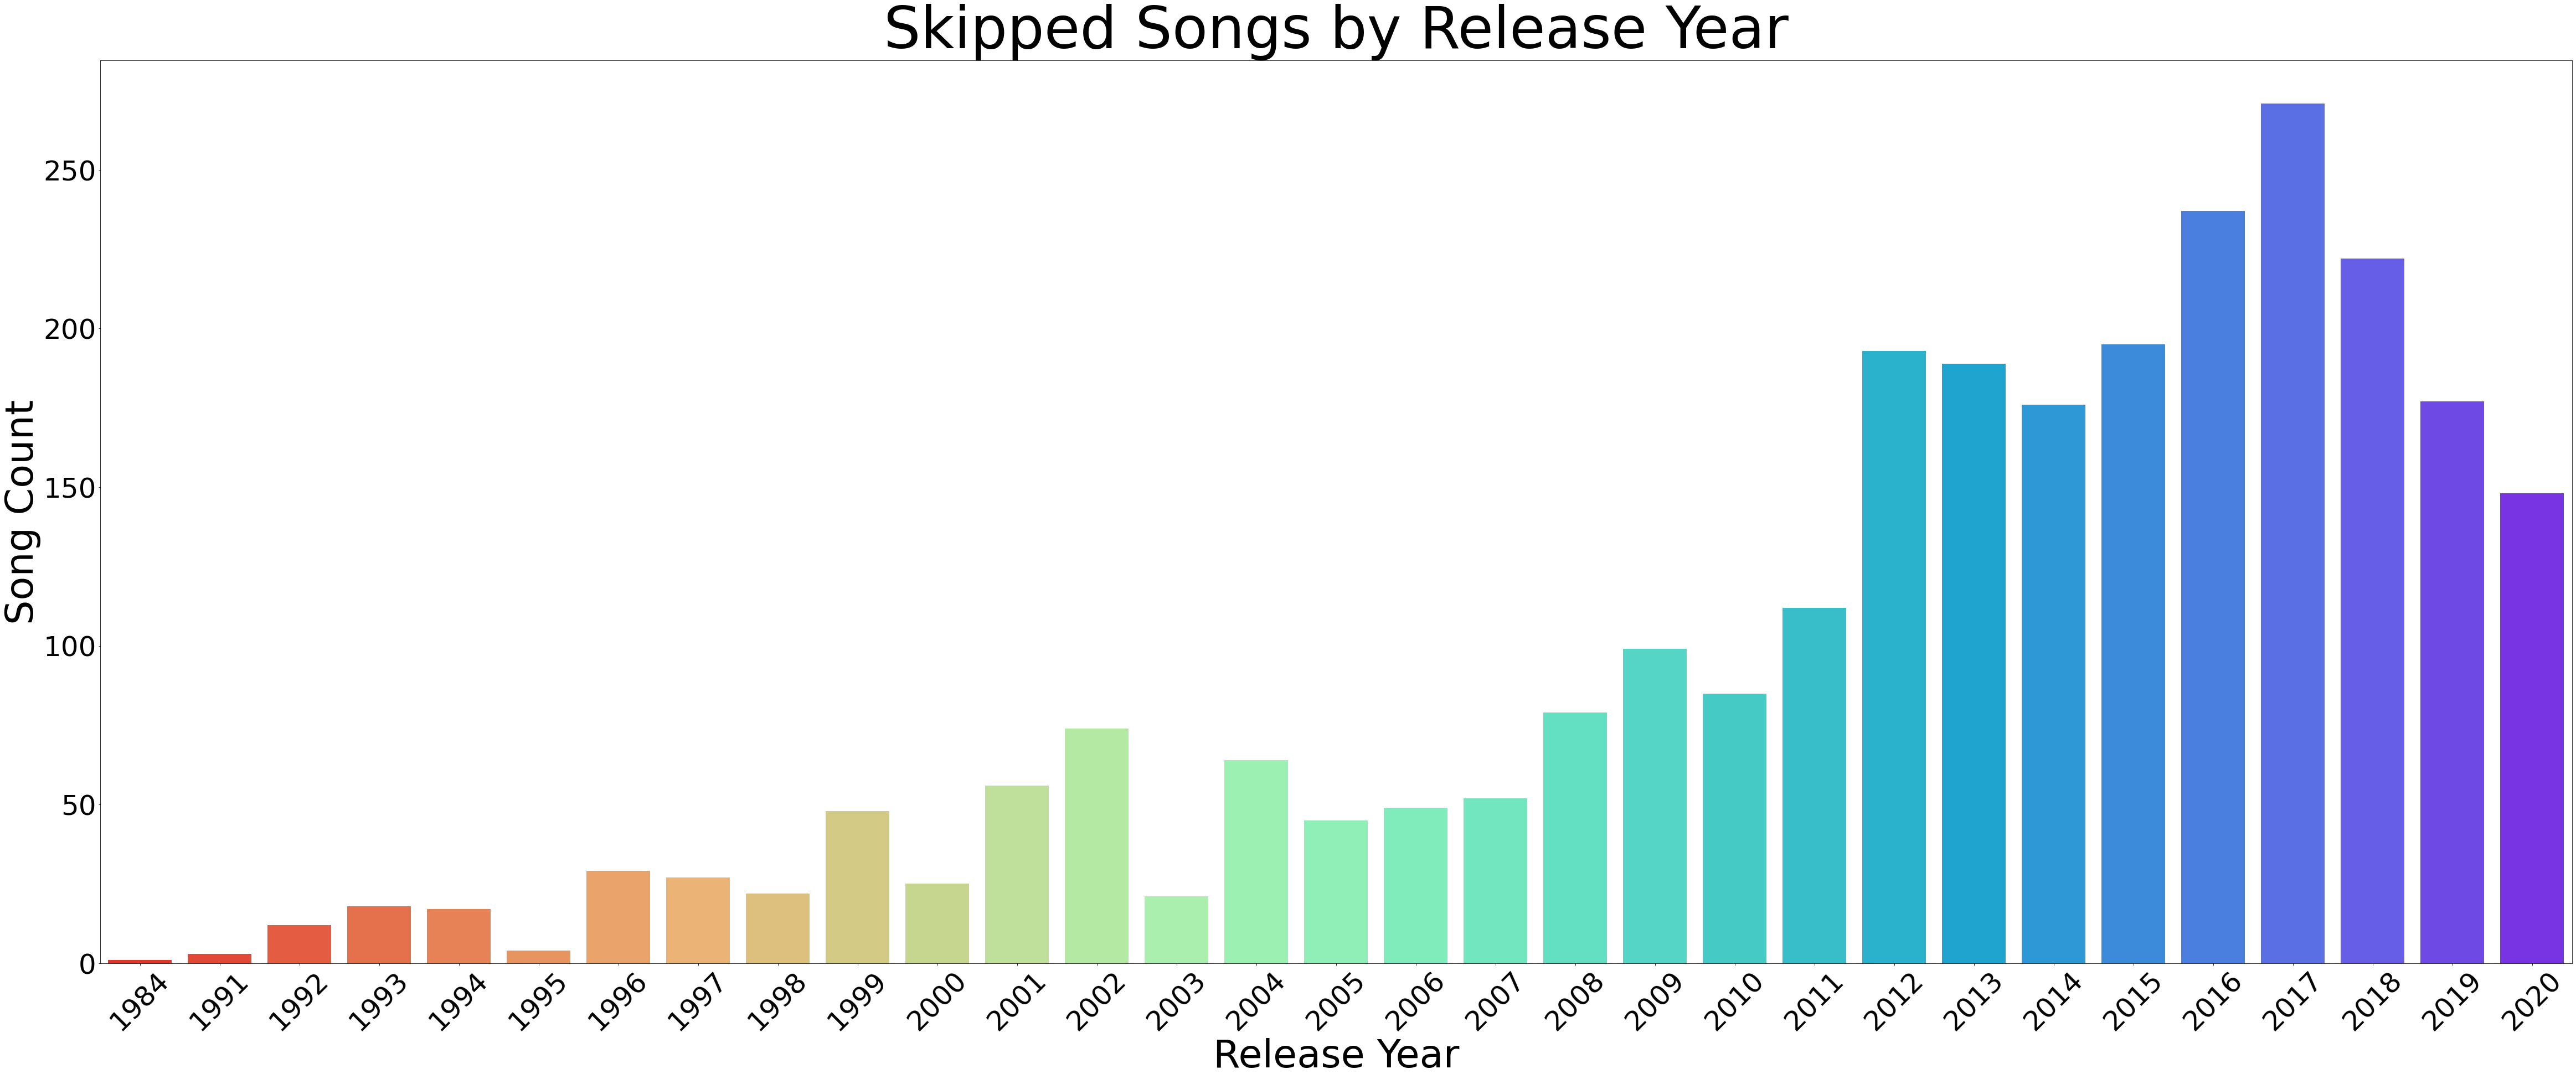

In [9]:
plt.figure(figsize=(80,30))
sns.countplot(df.loc[df['skip'] == 1]['release_year'], palette='rainbow_r')
plt.title("Skipped Songs by Release Year", size = 105, pad=20)
plt.ylabel("Song Count", size = 70,)
plt.yticks(size = 50)
plt.xlabel("Release Year", size = 70,)
plt.xticks(rotation=45, size = 50) ;

We can see from above that of the artists that I picked and the tracks pulled from the artists, the first time the artist named themselves in their track was in 1984. This is Weird Al's I lost on Jeopardy. Which to be honest I will not be skipping, but for fun we'll continue pretending that I will.

### Count Vectorizing the Lyrics
Now to get some insight into the lyrics in the dataframe. This will help me determine which words to add to the stop words

In [10]:
# instantiating Count Vectorizer
cv = CountVectorizer(analyzer = 'word',
                     stop_words = 'english') # standard stop words

feat = cv.fit_transform(df['lyrics']) # Will only do lyrics
word_cv = pd.DataFrame(feat.toarray(), columns= cv.get_feature_names()) # creating a dataframe
lyrics_skip = pd.concat([word_cv, df['skip']], axis=1) # and another dataframe that has the target column on

In [20]:
lyrics_skip.head()

,00,000,007,00wr7,01,0116,012,017_07moon_07,02,03,...,zurrenda,zus,zwarte,zwizzop,zy,zyu,zzz,zzzt,zzzzs,skip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# lyrics_skip.iloc[:,:-1][lyrics_skip['skip'] == 1].sum().sort_values(ascending=False).head(25)

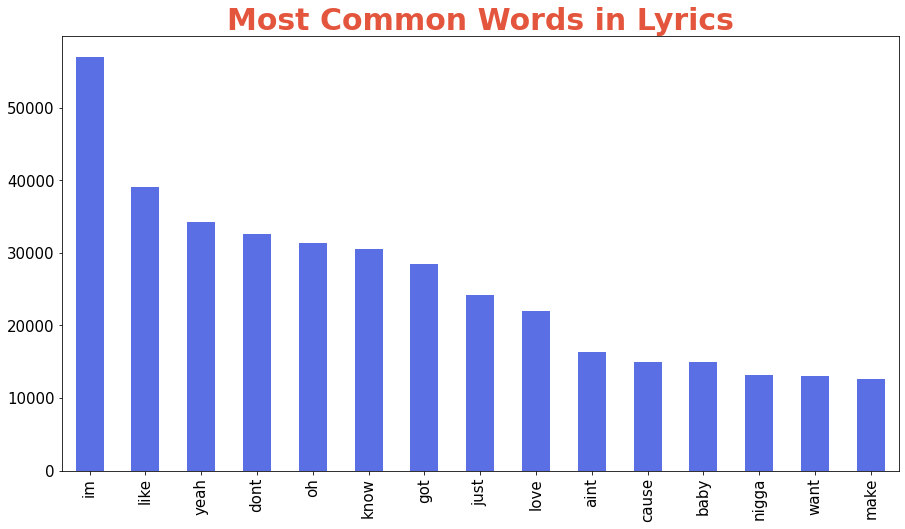

In [24]:
plt.figure(figsize=(15,8))
lyrics_skip.sum().sort_values(ascending=False).head(15).plot(kind='bar', color= "#596FE3")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most Common Words in Lyrics', size =30, color ='#E3553D', weight='bold');
plt.savefig('./visuals/top_words_cv.png', transparent=True, bbox_inches='tight')

In [13]:
from textblob import TextBlob

In [14]:
wiki = TextBlob("Textblob is shit but simple to use. What great fun!")


In [15]:
wiki.tags

[('Textblob', 'NNP'),
 ('is', 'VBZ'),
 ('shit', 'VBN'),
 ('but', 'CC'),
 ('simple', 'JJ'),
 ('to', 'TO'),
 ('use', 'VB'),
 ('What', 'WP'),
 ('great', 'JJ'),
 ('fun', 'NN')]

In [16]:
wiki.noun_phrases

WordList(['textblob', 'great fun'])

In [17]:
wiki.sentiment

Sentiment(polarity=0.24375000000000002, subjectivity=0.5267857142857143)